# Program 4 (`3.daphne`)

In [24]:
from evaluator import evaluate, ast_helper
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
i=3
fname='{}.daphne'.format(i)
exp = ast_helper(fname,directory='programs/')
%cat programs/3.daphne


(defn reduce [f x values]
               (if (empty? values)
                  x
                  (reduce f (f x (first values)) (rest values))))

(let [observations [0.9 0.8 0.7 0.0 -0.025 -5.0 -2.0 -0.1 0.0 0.13 0.45 6 0.2 0.3 -1 -1]
      init-dist (discrete [1.0 1.0 1.0])
      trans-dists {0 (discrete [0.1 0.5 0.4])
                   1 (discrete [0.2 0.2 0.6])
                   2 (discrete [0.15 0.15 0.7])}
      obs-dists {0 (normal -1 1)
                 1 (normal 1 1)
                 2 (normal 0 1)}]
      (reduce
        (fn [states obs]
          (let [state (sample (get trans-dists
                                   (peek states)))]
            (observe (get obs-dists state) obs)
            (conj states state)))
        [(sample init-dist)]
        observations))


**It’s an HMM again, this time implemented generically. Take the time to read this source code to see how this works. When you get this working you can be very proud. You will be most of the way towards a very powerful HOPPL language implementation.**

This program works by making use of a reduce over a function that does the HMM step. I.e. 
 * `f` in `defn reduce [f x values]` is `(fn [states obs] ... (conj states state)))`  
 * `x` is  `[(sample init-dist)]`
 * `values` is `observations`
 
Furthermore we can include a read for the observatoins, and don't have to inline that.

The reduce module at the end is also modular to any sized problem, not just the 3 states here. We could have `init-dist`, `trans-dists`, and `obs-dists` on disk and read them in, and the reduce module would still work on them. 

In [4]:
evaluate(exp, do_log=False) # example of the return

tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

In [6]:
import sys
sys.setrecursionlimit(1000000)

In [ ]:
n_samples=100*190
samples = [evaluate(exp).tolist() for sample in range(n_samples)]
# 9.4s / 100 samples 

In [14]:
samples_array = np.array([sample.tolist() for sample in samples])
# np.save('program4.npy',samples_array)

In [29]:
df = pd.DataFrame(samples_array)
df_wide = pd.melt(df.reset_index(),id_vars='index')



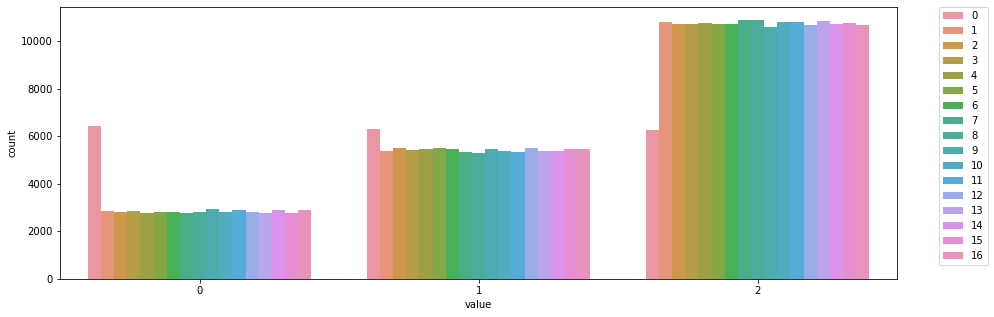

In [37]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="value", hue="variable", data=df_wide)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


In [47]:
mean = samples_array.mean(0)
std = samples_array.std(0)
var = samples_array.var(0)

for idx in range(samples_array.shape[1]):
    print('dim {} w.r.t. the prior | expectation {:1.3f} | std {:1.3f} | var {:1.3f}'.format(idx, mean[idx],var[idx],std[idx]))


dim 0 w.r.t. the prior | expectation 0.991 | std 0.667 | var 0.817
dim 1 w.r.t. the prior | expectation 1.419 | std 0.542 | var 0.736
dim 2 w.r.t. the prior | expectation 1.415 | std 0.539 | var 0.734
dim 3 w.r.t. the prior | expectation 1.415 | std 0.542 | var 0.736
dim 4 w.r.t. the prior | expectation 1.420 | std 0.535 | var 0.732
dim 5 w.r.t. the prior | expectation 1.416 | std 0.538 | var 0.734
dim 6 w.r.t. the prior | expectation 1.416 | std 0.539 | var 0.734
dim 7 w.r.t. the prior | expectation 1.427 | std 0.536 | var 0.732
dim 8 w.r.t. the prior | expectation 1.423 | std 0.542 | var 0.736
dim 9 w.r.t. the prior | expectation 1.404 | std 0.549 | var 0.741
dim 10 w.r.t. the prior | expectation 1.420 | std 0.540 | var 0.735
dim 11 w.r.t. the prior | expectation 1.416 | std 0.546 | var 0.739
dim 12 w.r.t. the prior | expectation 1.414 | std 0.540 | var 0.735
dim 13 w.r.t. the prior | expectation 1.426 | std 0.535 | var 0.732
dim 14 w.r.t. the prior | expectation 1.413 | std 0.546 | 